## Importing libraries

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Loading dataset

In [21]:
df = pd.read_csv('C:/Users/Mehedi Hassan Galib/Desktop/Python/datas/bill_authentication.csv')
df.tail()

,Variance,Skewness,Curtosis,Entropy,Class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


## Reconnaissance

In [22]:
df['Class'].value_counts()

0    762
1    610
Name: Class, dtype: int64

In [23]:
df.corr()

,Variance,Skewness,Curtosis,Entropy,Class
Variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
Skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
Curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
Entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
Class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


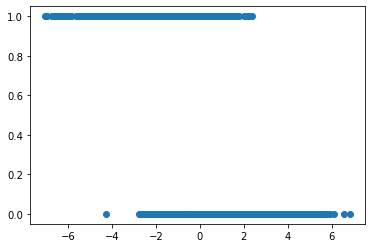

In [25]:
plt.scatter(df.Variance, df.Class)
plt.show()

In [26]:
df.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

## Split into x and y

In [47]:
X = pd.DataFrame(df[['Variance', 'Skewness', 'Curtosis', 'Entropy']])
y = df.Class

## Split into train and test

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

## Feature Scaling

In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Model

In [50]:
rf = RandomForestClassifier(n_estimators = 20, random_state = 42)
model = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

## Actual vs Predicted

In [53]:
dff = pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'actual_class','predicted_class'])
dff

,Variance,Skewness,Curtosis,Entropy,actual_class,predicted_class
0,0.402255,0.707320,-0.273405,-0.550364,0.0,0.0
1,-0.254741,1.035118,-0.979863,-0.604986,0.0,0.0
2,-0.137365,0.832914,-0.721387,-0.894201,0.0,0.0
3,-0.780404,1.703993,0.511191,-1.704951,0.0,0.0
4,0.708004,1.247646,-1.007130,-0.106888,0.0,0.0
...,...,...,...,...,...,...
270,-0.960595,-0.440014,0.443706,0.793856,1.0,1.0
271,0.355554,-0.303366,-0.714828,1.044682,1.0,1.0
272,1.075748,-1.214239,0.618465,0.639628,0.0,0.0
273,-0.254734,1.035118,-0.979863,-0.604986,0.0,0.0


## confusion_matrix

In [56]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[148,   0],
       [  2, 125]], dtype=int64)

## classification_report

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



## accuracy_score

In [59]:
accuracy_score(y_test, y_pred)

0.9927272727272727